In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib widget
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

from data_constructor import DataConstructor
from modules.data_visualizer import DataVisualizer
from modules.data_clustering import DataClustering
from modules.data_processing import DataProcessor
from modules.models import TimePeriod

## Constructing data
- Fetching from database
- Filling gaps in data
- Data is fully preprocessed

In [4]:
dc = DataConstructor()

time_period = TimePeriod(dt_from=dt.datetime(2022, 1, 1), dt_to=dt.datetime(2023, 1, 1))
df, tickers = dc.construct_df(time_period, filter_stablecoins=True)

Constructing dataframe: 100%|██████████| 169/169 [04:22<00:00,  1.55s/it]


=== Log ===
=== Diff ===
=== Std normalization ===
=== Ordering tickers ===


In [5]:
factors, weights, variance = DataProcessor.data_process_pca(df, tickers)

Clustering using MeanShift because it can find clusters without telling it how many clusters there are

In [6]:
weight_slice = weights[:3]
weight_labels = DataClustering.cluster_dbscan(weight_slice.T, eps=0.04, min_samples=3)

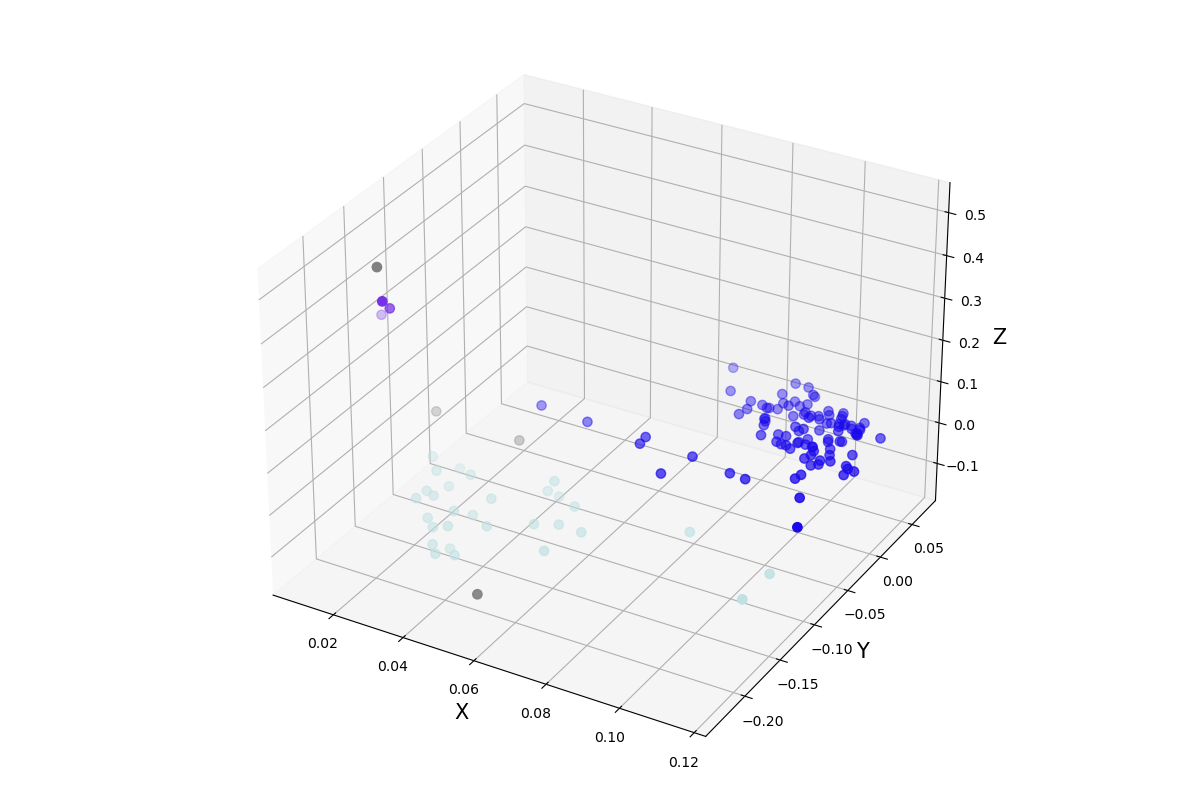

In [16]:
DataVisualizer.plot_3d_labeled_point_cloud(weight_slice.T, weight_labels)

## New cluster variance and plots

In [8]:
idxes = np.where(weight_labels == 0)[0]
label_tickers = [tickers[i] for i in idxes]

factors_1, weights_1, variance_1 = DataProcessor.data_process_pca(df[label_tickers], label_tickers)
weight_slice_1 = weights_1[:3]
variance_rounded_1 = DataProcessor.variance_round(variance_1)

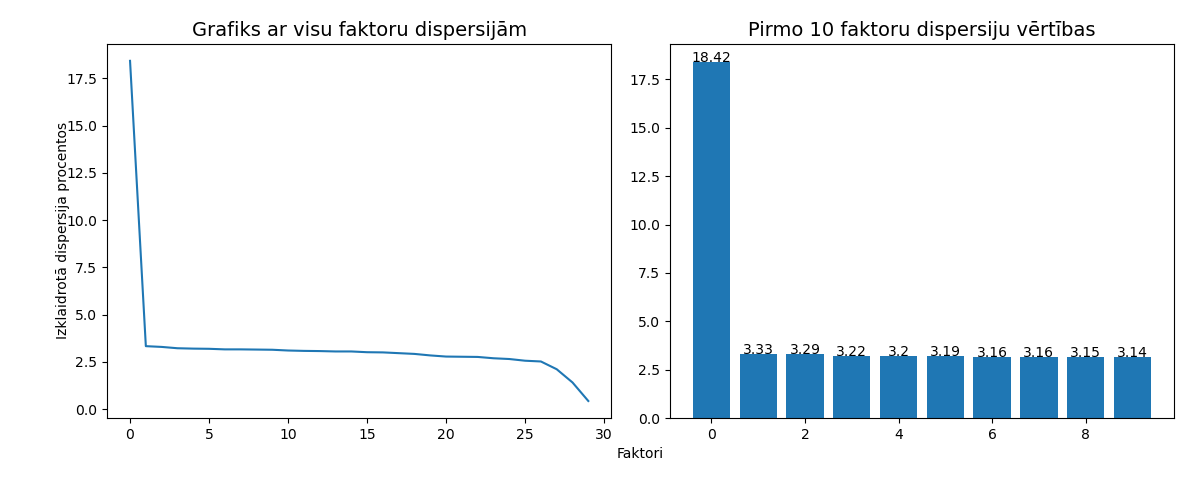

In [24]:
DataVisualizer.plot_variance(variance_rounded_1)

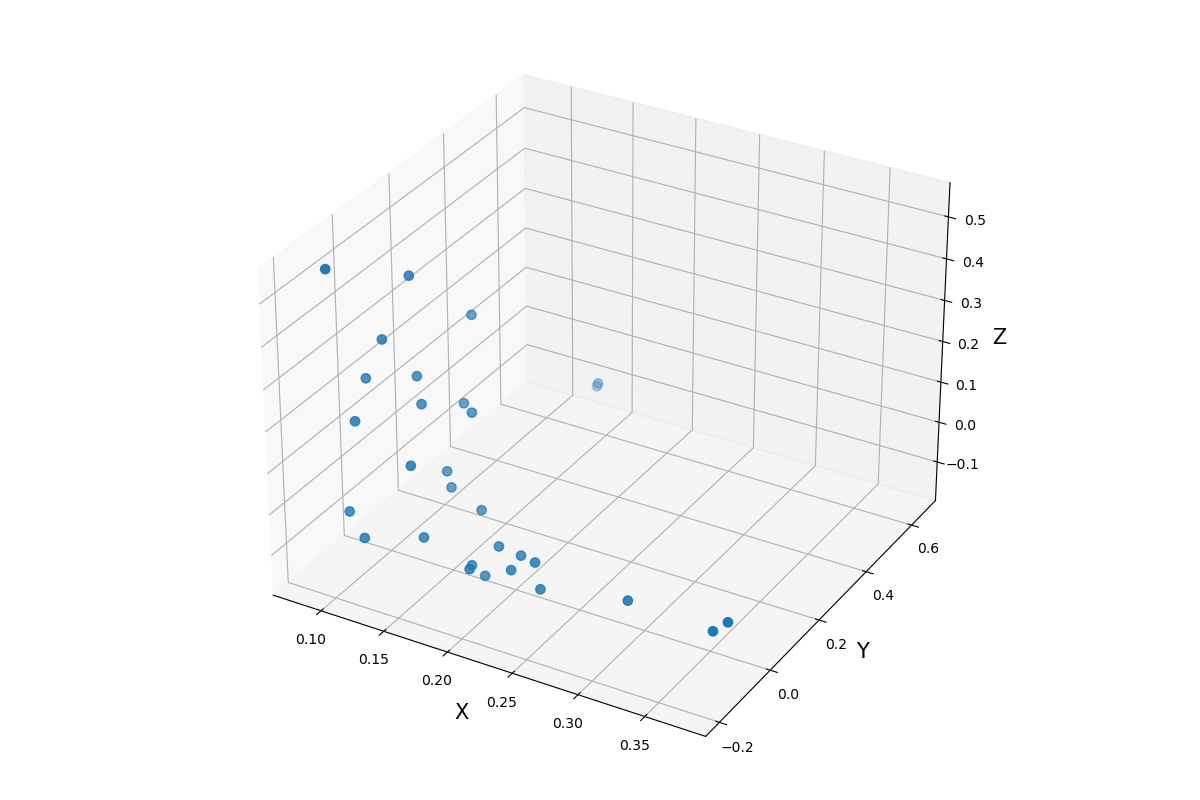

In [17]:
DataVisualizer.plot_3d_point_cloud(weight_slice_1.T)

Variance bar plot for cluster 2. (y axis)

In [18]:
idxes = np.where(weight_labels == 1)[0]
label_tickers = [tickers[i] for i in idxes]

factors_2, weights_2, variance_2 = DataProcessor.data_process_pca(df[label_tickers], label_tickers)
weight_slice_2 = weights_2[:3]
variance_rounded_2 = DataProcessor.variance_round(variance_2)

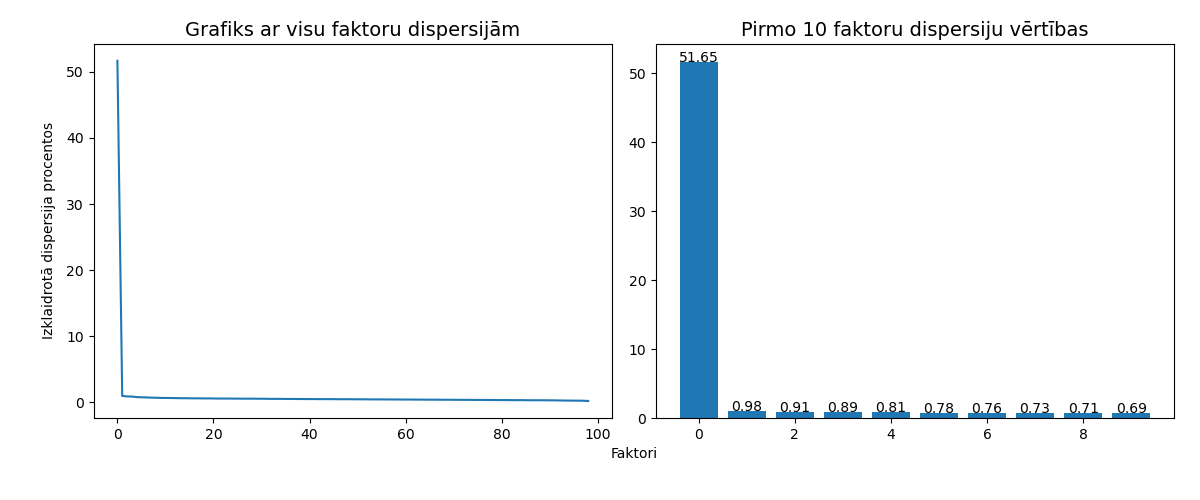

In [23]:
DataVisualizer.plot_variance(variance_rounded_2)

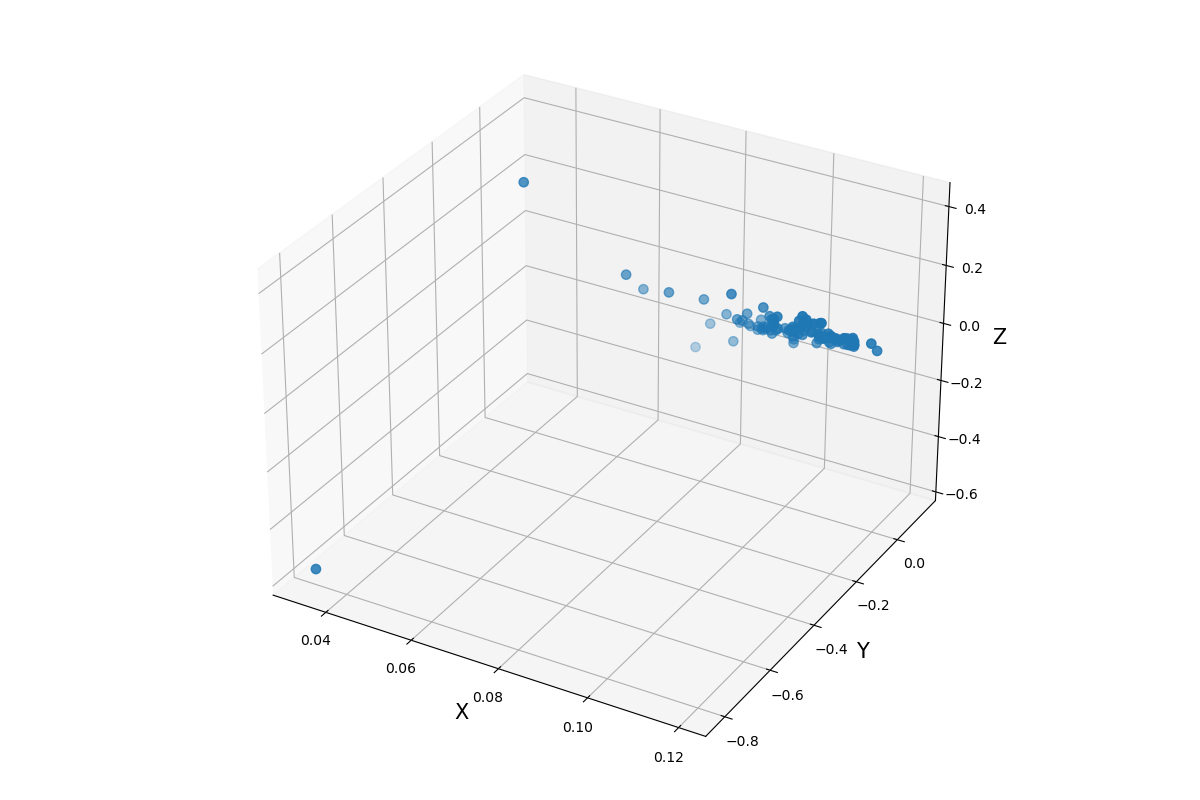

In [20]:
DataVisualizer.plot_3d_point_cloud(weight_slice_2.T)

In [12]:
idxes = np.where(weight_labels == 2)[0]
label_tickers = [tickers[i] for i in idxes]

factors_3, weights_3, variance_3 = DataProcessor.data_process_pca(df[label_tickers], label_tickers)
weight_slice_3 = weights_3[:3]
variance_rounded_3 = DataProcessor.variance_round(variance_3)

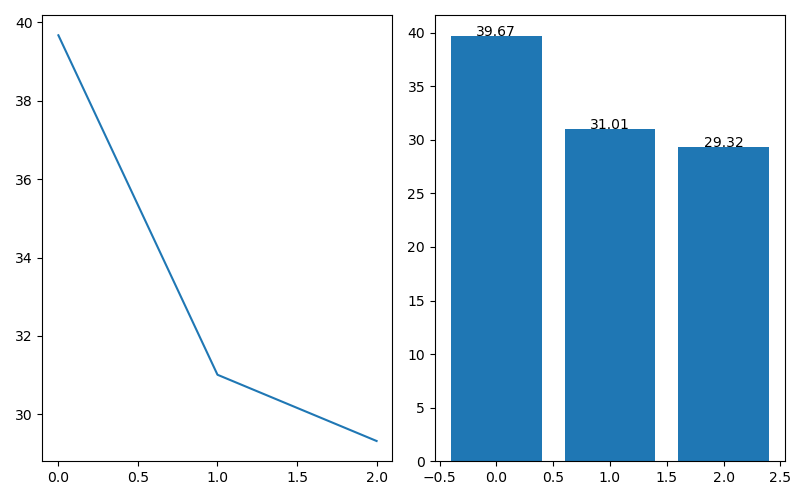

In [13]:
DataVisualizer.plot_variance(variance_rounded_3)

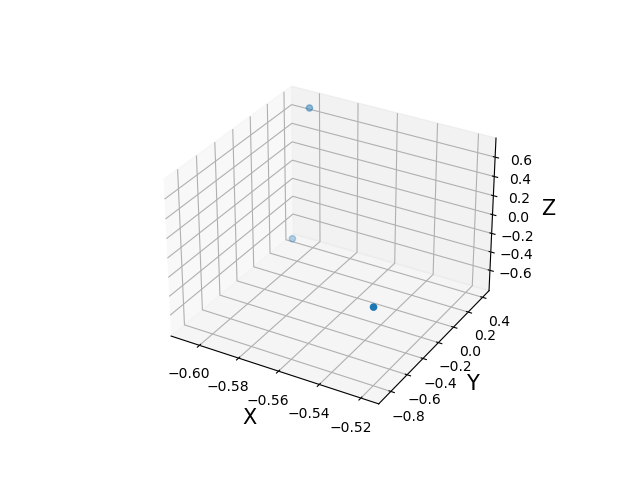

In [14]:
DataVisualizer.plot_3d_point_cloud(weight_slice_3.T)

Variance bar plot for cluster 3.